In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import cv2 as cv
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
tf.keras.backend.clear_session()

### Data Preprocessing

In [15]:
base_dir = './../dataset/'
train_image_dir = os.path.join(base_dir, 'character_digit/training_data')
val_image_dir = os.path.join(base_dir, 'character_digit/testing_data')

print(f"total class in training set is {len(os.listdir(train_image_dir))}")
print(f"total class in validation set is {len(os.listdir(train_image_dir))}")

for char in os.listdir(train_image_dir):
    print(f"total data for training label {char} is {len(os.listdir(train_image_dir+'/'+char))}")
    
for char in os.listdir(val_image_dir):
    print(f"total data for validation label {char} is {len(os.listdir(val_image_dir+'/'+char))}")

total class in training set is 36
total class in validation set is 36
total data for training label R is 573
total data for training label U is 573
total data for training label 9 is 573
total data for training label 0 is 573
total data for training label 7 is 573
total data for training label I is 573
total data for training label N is 573
total data for training label G is 573
total data for training label 6 is 573
total data for training label Z is 573
total data for training label 1 is 573
total data for training label 8 is 573
total data for training label T is 573
total data for training label S is 573
total data for training label A is 573
total data for training label F is 573
total data for training label O is 573
total data for training label H is 573
total data for training label M is 573
total data for training label J is 573
total data for training label C is 573
total data for training label D is 573
total data for training label V is 573
total data for training label Q i

In [16]:
train_data = ImageDataGenerator(
    rescale=1./255
)

val_data = ImageDataGenerator(
    rescale=1./255
)

In [17]:
train_generator = train_data.flow_from_directory(
    train_image_dir,
    target_size=(45,45),
    class_mode='categorical',
)
val_generator = val_data.flow_from_directory(
    val_image_dir,
    target_size=(45,45),
    class_mode='categorical',
)

Found 20628 images belonging to 36 classes.
Found 1008 images belonging to 36 classes.


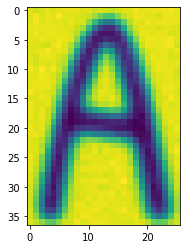

In [49]:
image_file = os.listdir(train_image_dir + '/A')[np.random.randint(500)]
im_path = os.path.join(train_image_dir + '/A', image_file)
img = mpimg.imread(im_path)
plt.imshow(img)
plt.show()

### Data Modeling

In [22]:
# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(45, 45, 3)),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=36, activation='softmax')
])

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [25]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator, verbose=1)

Epoch 1/50
645/645 [==============================] - 11s 17ms/step - loss: 0.2413 - accuracy: 0.9139 - val_loss: 0.1201 - val_accuracy: 0.9454
Epoch 2/50
645/645 [==============================] - 10s 16ms/step - loss: 0.2149 - accuracy: 0.9239 - val_loss: 0.1015 - val_accuracy: 0.9544
Epoch 3/50
645/645 [==============================] - 10s 15ms/step - loss: 0.2002 - accuracy: 0.9263 - val_loss: 0.1332 - val_accuracy: 0.9375
Epoch 4/50
645/645 [==============================] - 10s 16ms/step - loss: 0.1797 - accuracy: 0.9321 - val_loss: 0.0939 - val_accuracy: 0.9603
Epoch 5/50
645/645 [==============================] - 10s 16ms/step - loss: 0.1685 - accuracy: 0.9351 - val_loss: 0.1114 - val_accuracy: 0.9514
Epoch 6/50
645/645 [==============================] - 10s 16ms/step - loss: 0.1555 - accuracy: 0.9405 - val_loss: 0.0784 - val_accuracy: 0.9583
Epoch 7/50
645/645 [==============================] - 11s 17ms/step - loss: 0.1504 - accuracy: 0.9411 - val_loss: 0.1019 - val_accuracy:

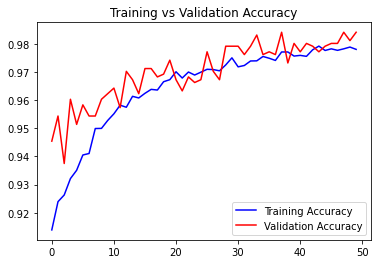

<Figure size 432x288 with 0 Axes>

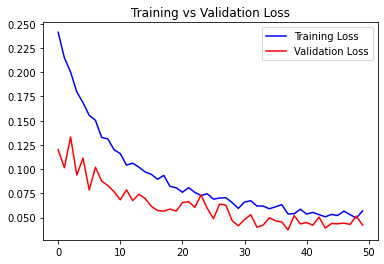

<Figure size 432x288 with 0 Axes>

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend(loc=0)
plt.figure()
plt.show()

#### If neccessary

In [21]:
# Tune the learning rate for optimizer
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [20]:
# Define callback class
class Callback_accuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99 or logs.get('loss')<0.01:
            print("The model already has more than 0.9 accuracy or less than 0.02 loss")
            self.model.stop_training = True

callbacks = Callback_accuracy()

(1e-08, 0.001, 0.0, 100.0)

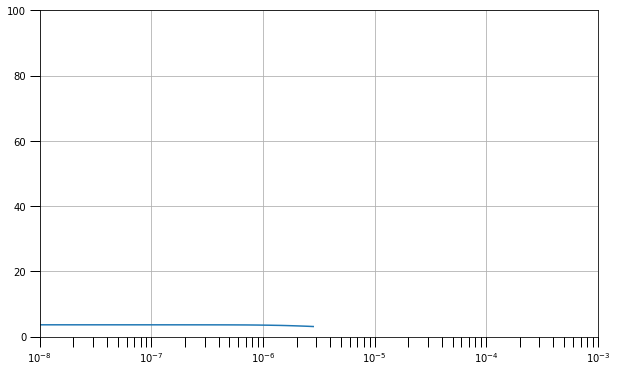

In [52]:
# # Define the learning rate array
# lrs = 1e-8 * (10 ** (np.arange(50) / 20))

# # Set the figure size
# plt.figure(figsize=(10, 6))

# # Set the grid
# plt.grid(True)

# # Plot the loss in log scale
# plt.semilogx(lrs, history.history["loss"])

# # Increase the tickmarks size
# plt.tick_params('both', length=10, width=1, which='both')

# # Set the plot boundaries
# plt.axis([1e-8, 1e-3, 0, 100])

In [ ]:
# If neccessary
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator, verbose=1, callbacks=[callbacks])

### Predicting Data

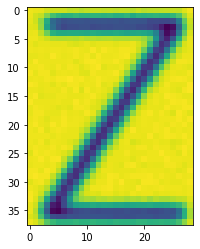

1/1 [==============================] - 0s 9ms/step
path: /Z
predicted:Z


In [86]:
from tensorflow.keras.utils import load_img, img_to_array

cls = '/Z'
image_file = os.listdir(train_image_dir + cls)[np.random.randint(500)]
im_path = os.path.join(train_image_dir + cls, image_file)
img = mpimg.imread(im_path)
plt.imshow(img)
plt.show()

classes_obj = {
    0: 0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:"A", 11:"B", 12:"C", 13:"D", 14:"E", 15:"F", 16:"G", 17:"H",
    18:"I", 19:"J", 20:"K", 21:"L", 22:"M", 23:"N", 24:"O", 25:"P", 26:"Q", 27:"R", 28:"S", 29:"T", 30:"U", 31:"V", 32:"W",
    33:"X", 34:"Y", 35:"Z"
}

 
# predicting images
img = load_img(im_path, target_size=(45, 45))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(f'path: {cls}\npredicted:{classes_obj.get(np.argmax(classes))}')